<a href="https://colab.research.google.com/github/hakim-cyber/Comp-Science-for-physics-and-chemistry/blob/main/pw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [1]:

from google.colab import files

uploaded = files.upload()

Saving pH.txt to pH.txt
Saving cosmicParticle.txt to cosmicParticle.txt
Saving wind.txt to wind.txt
Saving spinningTop.txt to spinningTop.txt


In [4]:
ph_data = np.loadtxt("pH.txt")


cosmic_times = np.loadtxt("cosmicParticle.txt")

wind_data = np.loadtxt("wind.txt")

angle_data = np.loadtxt("spinningTop.txt")


In [5]:
cosmic_times_sorted = np.sort(cosmic_times)

cosmic_delays = np.diff(cosmic_times_sorted)

In [6]:

np.random.seed(123)

# normal
X = np.random.normal(loc=1.0, scale=2.0, size=1000)

# uniform
Y = np.random.uniform(low=-1.0, high=1.0, size=1000)

# exp
lam = 1.0 / 5.0
Z = np.random.exponential(scale=1.0/lam, size=1000)

print("X mean≈", np.mean(X), "std≈", np.std(X, ddof=1))
print("Y mean≈", np.mean(Y), "std≈", np.std(Y, ddof=1))
print("Z mean≈", np.mean(Z), "std≈", np.std(Z, ddof=1))

X mean≈ 0.9208717278384163 std≈ 2.002576613786676
Y mean≈ 0.003826459652338521 std≈ 0.5853075584023197
Z mean≈ 4.895155767319826 std≈ 4.626111213421531


In [7]:


def analyze_dataset(data, name="Dataset", show_normal_pdf=True):

    data = np.asarray(data)


    mean = np.mean(data)
    std = np.std(data, ddof=1)
    print(f"=== {name} ===")
    print(f"Number of points: {len(data)}")
    print(f"Mean = {mean:.4f}")
    print(f"Std  = {std:.4f}")


    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Shapiro-Wilk: stat = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e}")
    alpha = 0.05
    if shapiro_p < alpha:
        print(f"-> p < {alpha}: Reject normality (data NOT normal at 5% level)")
    else:
        print(f"-> p >= {alpha}: Cannot reject normality (data may be normal)")


    plt.figure(figsize=(6, 4))

    count, bins, _ = plt.hist(data, bins=20, density=True, edgecolor='black', alpha=0.7)
    plt.xlabel(name)
    plt.ylabel('Density')
    plt.title(f"Histogram of {name}")

    if show_normal_pdf:

        x = np.linspace(np.min(data), np.max(data), 200)
        pdf = stats.norm.pdf(x, loc=mean, scale=std)
        plt.plot(x, pdf, linewidth=2)
    plt.show()


    plt.figure(figsize=(5, 5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-plot of {name} vs Normal")
    plt.grid(True)
    plt.show()

    print()


=== X (Normal target) ===
Number of points: 1000
Mean = 0.9209
Std  = 2.0026
Shapiro-Wilk: stat = 0.9990, p-value = 8.9661e-01
-> p >= 0.05: Cannot reject normality (data may be normal)


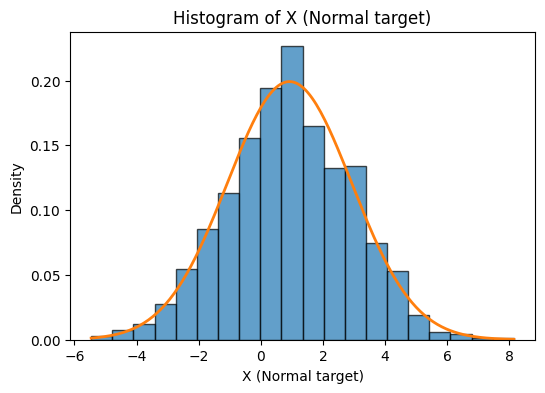

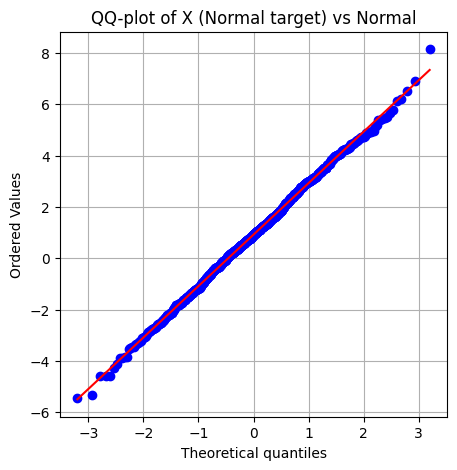


=== Y (Uniform target) ===
Number of points: 1000
Mean = 0.0038
Std  = 0.5853
Shapiro-Wilk: stat = 0.9472, p-value = 1.9815e-18
-> p < 0.05: Reject normality (data NOT normal at 5% level)


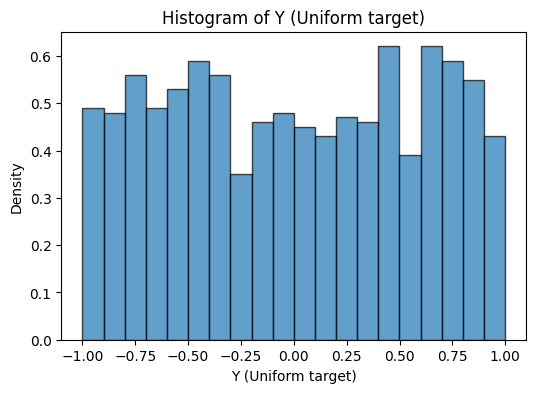

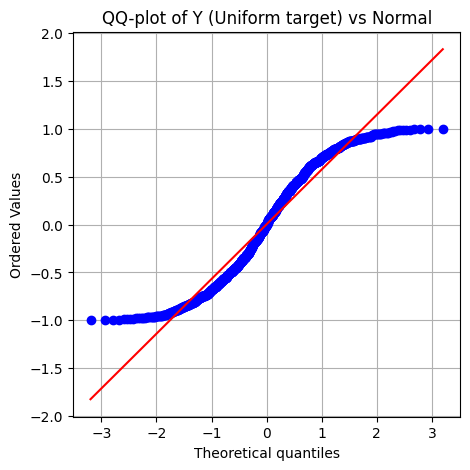


=== Z (Exponential target) ===
Number of points: 1000
Mean = 4.8952
Std  = 4.6261
Shapiro-Wilk: stat = 0.8521, p-value = 1.4126e-29
-> p < 0.05: Reject normality (data NOT normal at 5% level)


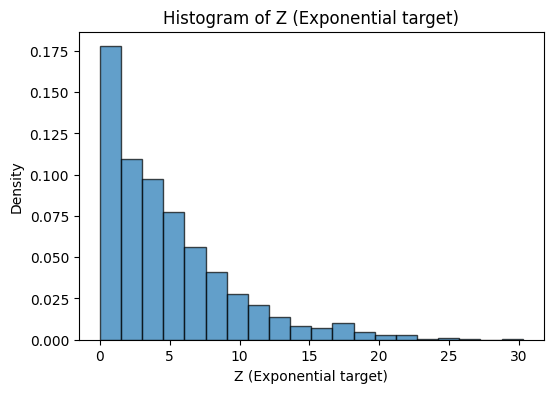

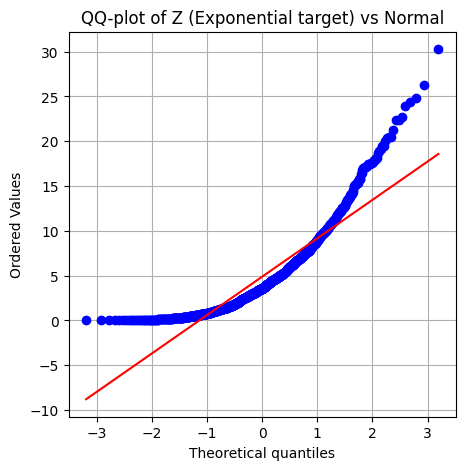

In [8]:

analyze_dataset(X, name="X (Normal target)")
analyze_dataset(Y, name="Y (Uniform target)", show_normal_pdf=False)
analyze_dataset(Z, name="Z (Exponential target)", show_normal_pdf=False)


=== pH values ===
Number of points: 60
Mean = 4.7648
Std  = 0.2121
Shapiro-Wilk: stat = 0.9882, p-value = 8.3014e-01
-> p >= 0.05: Cannot reject normality (data may be normal)


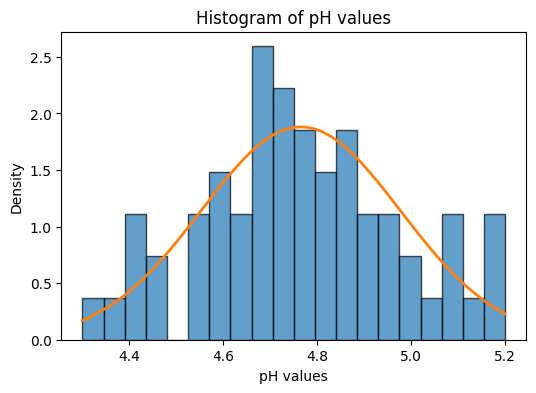

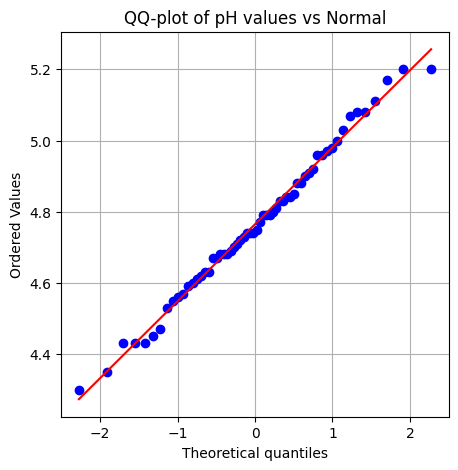

In [9]:

analyze_dataset(ph_data, name="pH values")


=== Cosmic delays ===
Number of points: 244
Mean = 44.2418
Std  = 41.5649
Shapiro-Wilk: stat = 0.8511, p-value = 1.3768e-14
-> p < 0.05: Reject normality (data NOT normal at 5% level)


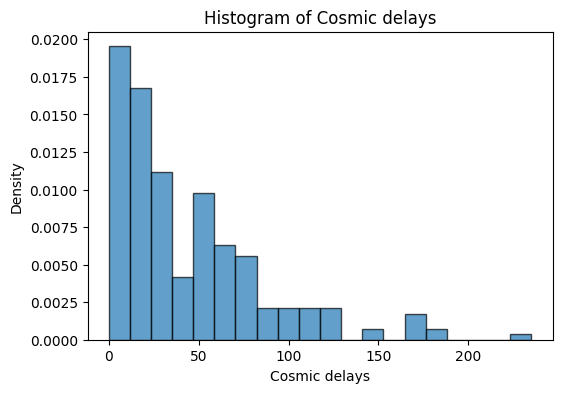

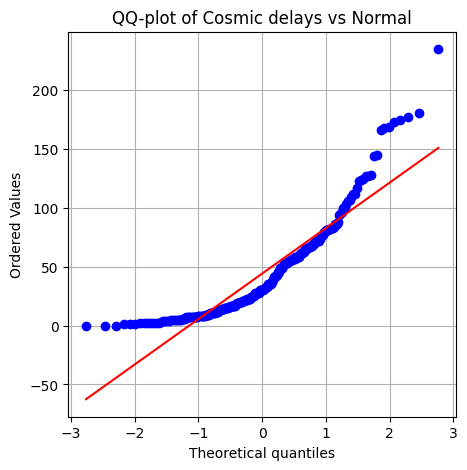

In [10]:
analyze_dataset(cosmic_delays, name="Cosmic delays", show_normal_pdf=False)

=== Daily wind velocity ===
Number of points: 365
Mean = 40.7600
Std  = 19.6142
Shapiro-Wilk: stat = 0.9923, p-value = 5.5085e-02
-> p >= 0.05: Cannot reject normality (data may be normal)


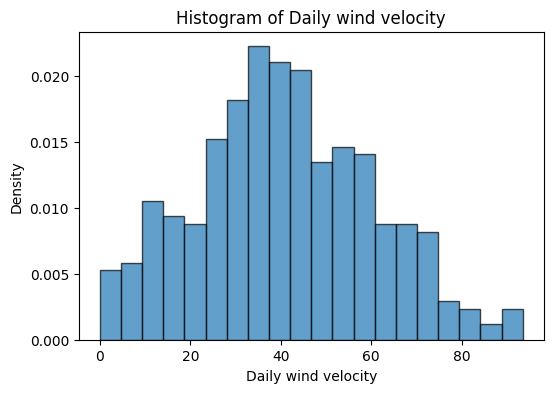

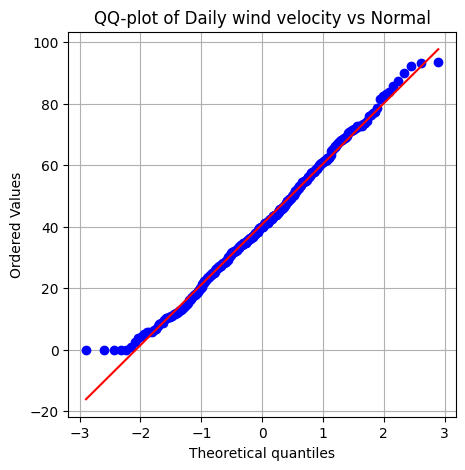

In [11]:
analyze_dataset(wind_data, name="Daily wind velocity", show_normal_pdf=False)

=== Spinning top stop angles ===
Number of points: 100
Mean = 177.4700
Std  = 105.3797
Shapiro-Wilk: stat = 0.9517, p-value = 1.0677e-03
-> p < 0.05: Reject normality (data NOT normal at 5% level)


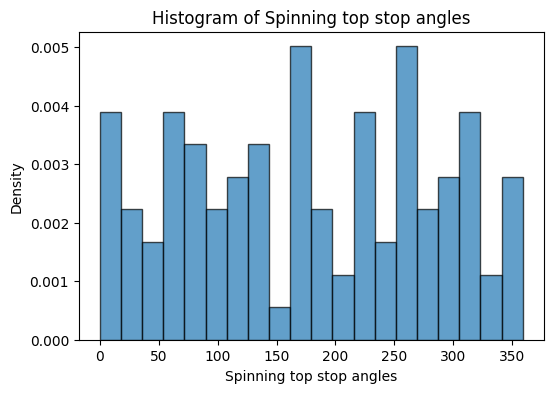

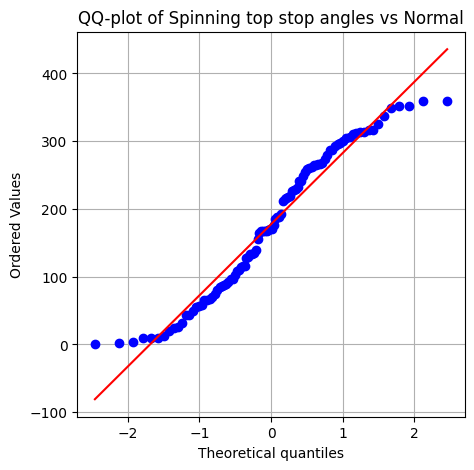

In [12]:
analyze_dataset(angle_data, name="Spinning top stop angles", show_normal_pdf=False)
